## PROBLEM STATEMENT -2
### Use decision trees to prepare a model on fraud data , treating those who have taxable_income <= 30000 as "Risky" and others are "Good"


In [59]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import warnings
warnings.filterwarnings("ignore")

In [60]:
## Reading the data

In [61]:
df_fd = pd.read_csv("E:\\deeksha\\python\\data\\Fraud_check.csv")

In [62]:
len(df_fd)

600

In [63]:
df_fd.head()

Undergrad Marital.Status  Taxable.Income  City.Population  Work.Experience  \
0        NO         Single           68833            50047               10   
1       YES       Divorced           33700           134075               18   
2        NO        Married           36925           160205               30   
3       YES         Single           50190           193264               15   
4        NO        Married           81002            27533               28   

  Urban  
0   YES  
1   YES  
2   YES  
3   YES  
4    NO

In [64]:
## According to problem statement creating new column  for taxable.income on the basis on risky and good 

In [65]:
def is_risky(row):
    if row["Taxable.Income"] <= 30000:
        return "Risky"
    else:
        return "Good"

In [67]:
df_fd["target"] = np.where(df_fd['Taxable.Income'] <= 30000 , "Risky", "Good")

In [69]:
df_fd['target'].unique()

array(['Good', 'Risky'], dtype=object)

In [70]:
df_fd.groupby('target').count()

Undergrad  Marital.Status  Taxable.Income  City.Population  \
target                                                               
Good          476             476             476              476   
Risky         124             124             124              124   

        Work.Experience  Urban  
target                          
Good                476    476  
Risky               124    124

### mention about imbalanced dataset

## using 1 hot encoding converting categorical data to binary

In [73]:
df_fd = pd.get_dummies(df_fd , columns =["Undergrad","Marital.Status","Urban"],drop_first=True)

## plotting heat map to check correlation among the features

<AxesSubplot:>

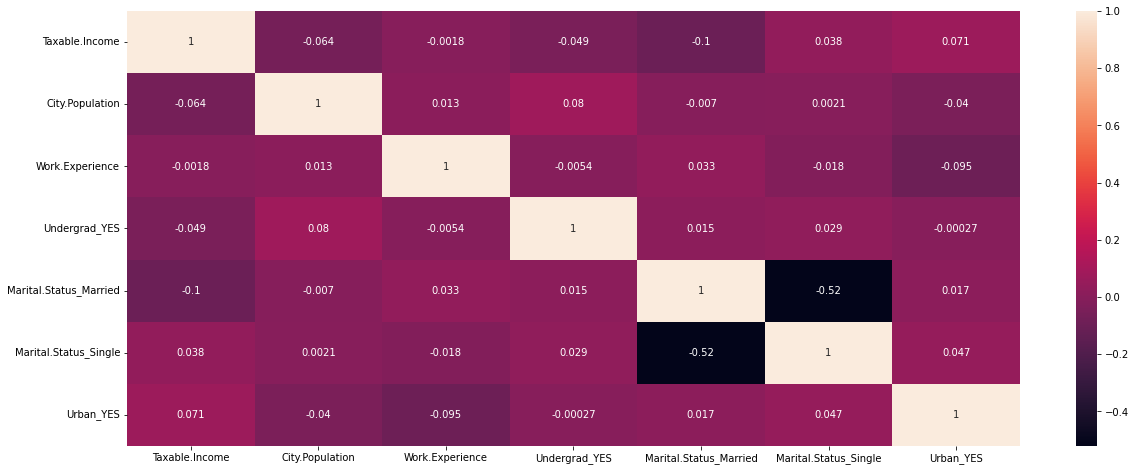

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data (you can replace this with your own dataset)
data = df_fd[["Taxable.Income","City.Population","Work.Experience","Undergrad_YES","Marital.Status_Married","Marital.Status_Single","Urban_YES"]]

# # Create a heatmap
# sns.set(style="whitegrid")  # Optional: Set the style of the plot
plt.figure(figsize=(20, 8))  # Optional: Set the size of the plot
# sns.heatmap(data, annot=True, cmap="YlGnBu", fmt=".2f")
sns.heatmap(data.corr(),annot=True)

In [84]:
df_fd.tail()

Taxable.Income  City.Population  Work.Experience target  Undergrad_YES  \
595           76340            39492                7   Good              1   
596           69967            55369                2   Good              1   
597           47334           154058                0   Good              0   
598           98592           180083               17   Good              1   
599           96519           158137               16   Good              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES  
595                       0                      0          1  
596                       0                      0          1  
597                       0                      0          1  
598                       1                      0          0  
599                       0                      0          0

In [85]:
df_fd= df_fd.drop(["Taxable.Income"],axis=1)

In [86]:
X = df_fd.drop(["target"],axis=1)

In [87]:
X

City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
0              50047               10              0                       0   
1             134075               18              1                       0   
2             160205               30              0                       1   
3             193264               15              1                       0   
4              27533               28              0                       1   
..               ...              ...            ...                     ...   
595            39492                7              1                       0   
596            55369                2              1                       0   
597           154058                0              0                       0   
598           180083               17              1                       1   
599           158137               16              0                       0   

     Marital.Status_Single  Urban_YES  
0                        1          1  
1                        0          1  
2                        0          1  
3                        1          1  
4                        0          0  
..                     ...        ...  
595                      0          1  
596                      0          1  
597                      0          1  
598                      0          0  
599                      0          0  

[600 rows x 6 columns]

In [88]:
y = df_fd["target"]

In [89]:
y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: target, Length: 600, dtype: object

In [90]:
df_fd['target']= np.where(df_fd['target'] == 'Good', '0', '1')

In [91]:
df_fd

City.Population  Work.Experience target  Undergrad_YES  \
0              50047               10      0              0   
1             134075               18      0              1   
2             160205               30      0              0   
3             193264               15      0              1   
4              27533               28      0              0   
..               ...              ...    ...            ...   
595            39492                7      0              1   
596            55369                2      0              1   
597           154058                0      0              0   
598           180083               17      0              1   
599           158137               16      0              0   

     Marital.Status_Married  Marital.Status_Single  Urban_YES  
0                         0                      1          1  
1                         0                      0          1  
2                         1                      0          1  
3                         0                      1          1  
4                         1                      0          0  
..                      ...                    ...        ...  
595                       0                      0          1  
596                       0                      0          1  
597                       0                      0          1  
598                       1                      0          0  
599                       0                      0          0  

[600 rows x 7 columns]

In [92]:
y = df_fd["target"]

In [93]:
y

0      0
1      0
2      0
3      0
4      0
      ..
595    0
596    0
597    0
598    0
599    0
Name: target, Length: 600, dtype: object

In [94]:
X

City.Population  Work.Experience  Undergrad_YES  Marital.Status_Married  \
0              50047               10              0                       0   
1             134075               18              1                       0   
2             160205               30              0                       1   
3             193264               15              1                       0   
4              27533               28              0                       1   
..               ...              ...            ...                     ...   
595            39492                7              1                       0   
596            55369                2              1                       0   
597           154058                0              0                       0   
598           180083               17              1                       1   
599           158137               16              0                       0   

     Marital.Status_Single  Urban_YES  
0                        1          1  
1                        0          1  
2                        0          1  
3                        1          1  
4                        0          0  
..                     ...        ...  
595                      0          1  
596                      0          1  
597                      0          1  
598                      0          0  
599                      0          0  

[600 rows x 6 columns]

In [95]:
# Splitting data into training and testing data set
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)


### # Building Decision Tree Classifier using gini Criteria

In [135]:
model = DecisionTreeClassifier(criterion = 'gini', max_depth=10, class_weight='balanced')
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10)

In [136]:
DecisionTreeClassifier?

<AxesSubplot:>

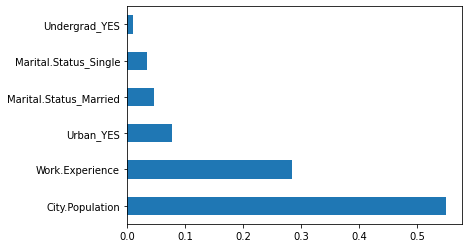

In [137]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).nlargest(100).plot(kind='barh')

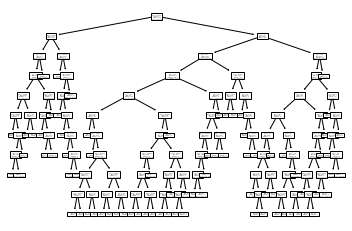

In [138]:
#PLot the decision tree
from sklearn import tree
tree.plot_tree(model);

In [139]:
#Prediction and computing the accuracy
preds =model.predict(X_test)

In [140]:
#Prediction and computing the accuracy
y_pred_train =model.predict(X_train)

In [141]:
pd.crosstab(y_train,y_pred_train) # getting the 2 way table to understand the correct and wrong predictions

col_0     0   1
target         
0       326  58
1        14  82

In [142]:
confusion_matrix(y_train, y_pred_train)

array([[326,  58],
       [ 14,  82]], dtype=int64)

In [143]:
df_fd.groupby('target').count()

City.Population  Work.Experience  Undergrad_YES  \
target                                                    
0                   476              476            476   
1                   124              124            124   

        Marital.Status_Married  Marital.Status_Single  Urban_YES  
target                                                            
0                          476                    476        476  
1                          124                    124        124

In [144]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0    0   1
target        
0       64  28
1       23   5

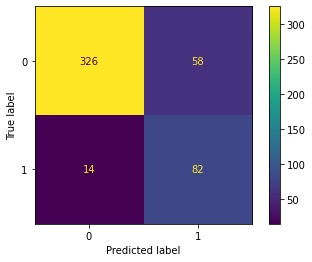

In [149]:
plot_confusion_matrix(model, X_train, y_train) 

In [155]:
y_train_pred = model.predict(X_train)

In [156]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.96      0.85      0.90       384
           1       0.59      0.85      0.69        96

    accuracy                           0.85       480
   macro avg       0.77      0.85      0.80       480
weighted avg       0.88      0.85      0.86       480



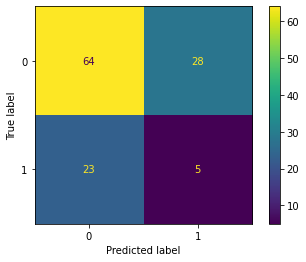

In [150]:
plot_confusion_matrix(model, X_test, y_test) 

In [153]:
confusion_matrix(y_test, preds)

array([[64, 28],
       [23,  5]], dtype=int64)

In [154]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.70      0.72        92
           1       0.15      0.18      0.16        28

    accuracy                           0.57       120
   macro avg       0.44      0.44      0.44       120
weighted avg       0.60      0.57      0.59       120



### with entropy and balanced

In [157]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, class_weight='balanced')
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10)

<AxesSubplot:>

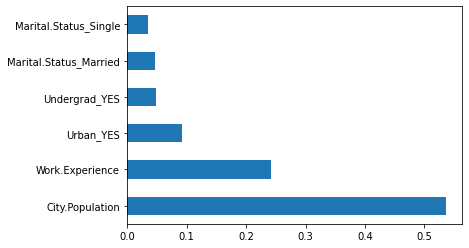

In [158]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=False).nlargest(100).plot(kind='barh')

In [159]:
#Prediction and computing the accuracy
preds =model.predict(X_test)

In [160]:
#Prediction and computing the accuracy
y_pred_train =model.predict(X_train)

In [161]:
pd.crosstab(y_train,y_pred_train) # getting the 2 way table to understand the correct and wrong predictions

col_0     0   1
target         
0       339  45
1        21  75

In [162]:
confusion_matrix(y_train, y_pred_train)

array([[339,  45],
       [ 21,  75]], dtype=int64)

In [164]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0    0   1
target        
0       69  23
1       24   4

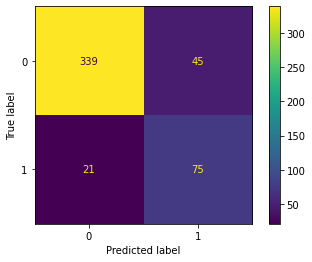

In [165]:
plot_confusion_matrix(model, X_train, y_train) 

In [166]:
y_train_pred = model.predict(X_train)

In [167]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.94      0.88      0.91       384
           1       0.62      0.78      0.69        96

    accuracy                           0.86       480
   macro avg       0.78      0.83      0.80       480
weighted avg       0.88      0.86      0.87       480



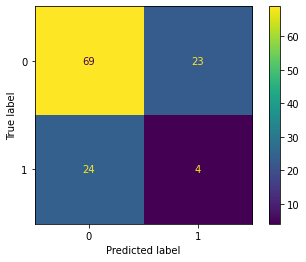

In [168]:
plot_confusion_matrix(model, X_test, y_test) 

In [169]:
confusion_matrix(y_test, preds)

array([[69, 23],
       [24,  4]], dtype=int64)

In [170]:
print(classification_report(y_test, preds))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75        92
           1       0.15      0.14      0.15        28

    accuracy                           0.61       120
   macro avg       0.45      0.45      0.45       120
weighted avg       0.60      0.61      0.61       120



### with entropy and oversampling - 1:4

In [276]:
model = DecisionTreeClassifier(criterion = 'entropy', max_depth=10, class_weight={'1':5, '0':1}, random_state=42)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={'0': 1, '1': 5}, criterion='entropy',
                       max_depth=10, random_state=42)

In [230]:
DecisionTreeClassifier?

In [285]:
feat_importances = pd.Series(data=model.feature_importances_, index=X.columns)
feat_importances.sort_values(ascending=True, inplace=True)

<AxesSubplot:>

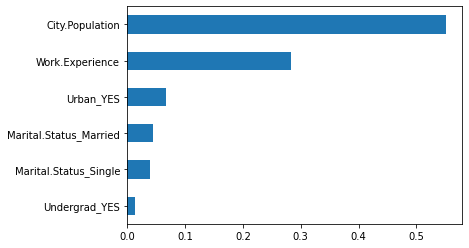

In [287]:
feat_importances.plot.barh()

### explain feature importance

In [254]:
#Prediction and computing the accuracy
y_pred_proba_train =model.predict_proba(X_train)

In [268]:
y_pred_train = np.where(y_pred_proba_train[:,1]>0.35,'1','0')

In [269]:
pd.crosstab(y_train,y_pred_train) # getting the 2 way table to understand the correct and wrong predictions

col_0     0    1
target          
0       249  135
1         0   96

In [272]:
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

           0       0.99      0.69      0.81       384
           1       0.44      0.98      0.61        96

    accuracy                           0.75       480
   macro avg       0.72      0.83      0.71       480
weighted avg       0.88      0.75      0.77       480



In [266]:
y_pred_proba_test = model.predict_proba(X_test)

In [270]:
y_pred_test = np.where(y_pred_proba_test[:,1]>0.35,'1','0')

In [273]:
pd.crosstab(y_test,y_pred_test) # getting the 2 way table to understand the correct and wrong predictions

col_0    0   1
target        
0       52  40
1       15  13

In [274]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.78      0.57      0.65        92
           1       0.25      0.46      0.32        28

    accuracy                           0.54       120
   macro avg       0.51      0.51      0.49       120
weighted avg       0.65      0.54      0.58       120

